<img src="images/ceppe-smartdatascience.png" alt="CEPPE" style="width: 500px;"/>

# Computación interactiva con Jupyter Notebook

![Jupyter](images/jupyter_logo.png)

* **Jupyter Notebook es un entorno de programación interactivo en el navegador**
* Esto supone una nueva forma de programar
* Se originó a partir de IPython, allá por el 2001
* A día de hoy es independiente del lenguaje (**40 kernels diferentes**)

## Entonces ... ¿qué es un notebook?

¡Esto que estás viendo es un notebook!

**Prueba a hacer doble click sobre esta frase** ¡Tranquil@! no pasa nada. Si quieres que todo vuelva a estar como antes solo tienes que pulsar sobre este botón en la barra superior<center><img style="height: 40px" src="images/play.png"></center>

Como has podido ver, al hacer doble click sobre una *celda* puedes editar el contenido. Las celdas pueden contener:

* texto como el que estás viendo,
* ecuaciones escritas en $\LaTeX$ como:

$$ E=mc^2 $$
$$ f(t)=U_{\infty}\text{·}\left((t-t_{0})\text{·}e^{-i\alpha}+\frac{R^{2}}{t-t_{0}}\text{·}e^{i\alpha}\right)+\frac{i\Gamma}{2\pi}\text{·}ln(t-t_{0})=\Phi+i\Psi $$

* imágenes

 <center><img src="images/python_xkcd.png" /></center>
 
 * y lo más importante: *código* que puede ser modificado y ejecutado en la celda

In [1]:
# puedes hacer click en la celda modificarla y
# ejecutarla dando al play o utilizando el atajo
# shift + enter

print('Helo world')

Helo world


Puedes elegir el tipo de celda (texto, código, títulos...) en la barra superior, utilizando el desplegable en el que pone: `Markdown`, `Code` ...

* Si el resultado de ejecutar una celda es una imagen o gráfica, se mostrará en el notebook:

In [2]:
# importamos el módulo de pintar
%matplotlib inline
import matplotlib.pyplot as plt

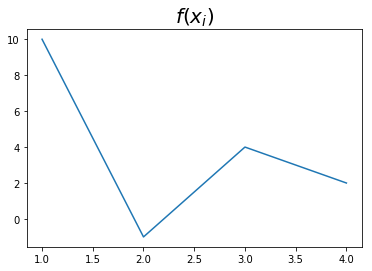

In [3]:
plt.plot([1, 2, 3, 4], [10, -1, 4, 2])

plt.title('$f(x_i)$', fontsize=20);

* Por último, el notebook nos da la posibilidad de exportarlo a otros formatos (html, pdf, tex...) con `jupyter nbconvert` de manera que podamos enseñarle una versión estática a alguien que no tenga Python.

## y es interactivo...

Y esto quiere decir que puedes crear widgets como deslizadores y cajas de selección de manera muy sencilla para explorar tu problema:

In [4]:
# sympy es una librería de cálculo simbólico
from sympy import init_printing, Symbol, Eq, factor

init_printing(use_latex=True)

In [5]:
x = Symbol('x')
x

Creemos ahora una función que factorice la expresión 
$$x^n - 1$$

In [6]:
def factorit(n):
    return Eq(x**n-1, factor(x**n-1))

In [7]:
factorit(3)

¿Pero qué pasa si queremos variar $n$ todo el rato?

In [8]:
from ipywidgets import interact

In [9]:
interact(factorit, n=(2,20));

A Jupyter Widget

#### Otro ejemplo

In [10]:
import numpy as np

In [11]:
def frecuencias(f1=10.0, f2=100.0):
    max_time = 0.5
    n = 5000
    t = np.linspace(0, max_time, n)
    signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    
    plt.plot(t, signal, label="Señal")
    plt.xlabel("Tiempo ($t$)")
    plt.title("Dos frecuencias")
    plt.legend()

In [12]:
interact(frecuencias, f1=(1.0, 50.), f2=(10.0, 70.0));

A Jupyter Widget

# El ecosistema científico se articula en torno a un gran número de librerías y el notebook es de gran utilidad para interactuar con todas ellas

![first_layer](images/slides/slides-27.png)

###### Original: Jake Vanderplas - Python Data Science Stack

Hasta ahora hemos visto ejemplos utilzando las librerías de representación gráfica, `matplotlib`, y de cáclulo simbólico, `sympy`. Por último mostraremos un ejemplo de la librería de análisis de datos `pandas`

<center><img src="images/pandas_logo.png" width="500px"/></center>

In [13]:
import pandas as pd

In [14]:
# Leyendo los datos
data = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv",
                   index_col='dt',
                   parse_dates=['dt'])

# Mostrando las primeras líneas
data.query("Country == 'Spain' ").head(25)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,9.346,2.218,Spain
1743-12-01,NaN,NaN,Spain
1744-01-01,NaN,NaN,Spain
1744-02-01,NaN,NaN,Spain
1744-03-01,NaN,NaN,Spain
1744-04-01,13.567,2.325,Spain
1744-05-01,14.274,2.176,Spain
1744-06-01,19.288,2.212,Spain
1744-07-01,22.056,2.224,Spain


In [15]:
# Descripción estadística
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [16]:
# Paises distintos
pd.unique(data.Country)

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

Pintemos ahora la evolución de la temperatura media anual de cada pais al lado de la temperatura media mundial con una franja que represente la desviación típica.

In [17]:
countries = pd.unique(data.Country)

def plot_temp(country):
    sel_items = (data.Country == country)
    
    data_ = data[sel_items]
    gby = data_.groupby(by=[data_.index.year]).mean()
    gby.index.names = ['year']
    
    gby2 = data.groupby(by=[data.index.year]).agg(['mean', 'std'])
    gby2 = gby2.AverageTemperature
    
    ax = gby2.plot(y='mean', label='world average')
    ax.fill_between(gby2.index, gby2['mean'] + gby2['std'], gby2['mean'] - gby2['std'], alpha=0.1, label='std')
    
    ax = gby.plot(y='AverageTemperature', figsize=(10, 3), label=country, ax=ax)
    
    plt.legend()

In [18]:
interact(plot_temp, country=countries);

A Jupyter Widget

---

In [19]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = 'style/style.css'
HTML(open(css_file, "r").read())